In [1]:
!cd

C:\Users\master\TIL\Visualization


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
tips = pd.read_csv('../Pandas/tips.csv')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


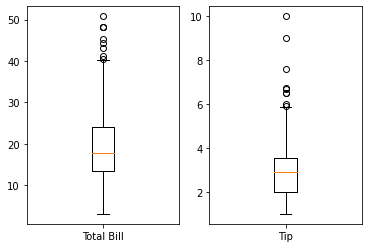

In [5]:
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(tips.total_bill, labels=['Total Bill'])
ax[1].boxplot(tips.tip, labels=['Tip'])
plt.show()

In [6]:
# 변이계수
tips.total_bill.std()/tips.total_bill.mean(), tips.tip.std()/tips.tip.mean()

(0.44993620594706724, 0.4614775118459888)

<AxesSubplot:>

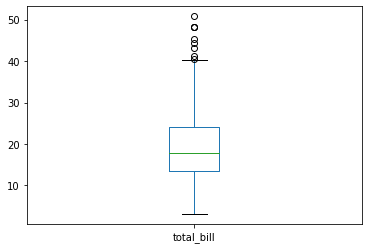

In [7]:
tips.total_bill.plot(kind='box')

<AxesSubplot:xlabel='total_bill'>

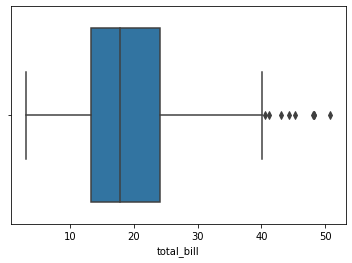

In [8]:
sns.boxplot(data=tips, x='total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

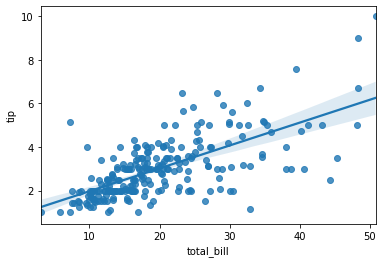

In [9]:
sns.regplot(data=tips, x='total_bill', y='tip')

<AxesSubplot:xlabel='size', ylabel='tip'>

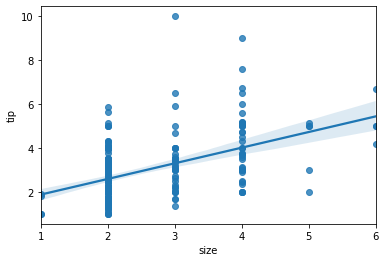

In [10]:
sns.regplot(data=tips, x='size', y='tip')

<AxesSubplot:xlabel='total_bill', ylabel='size'>

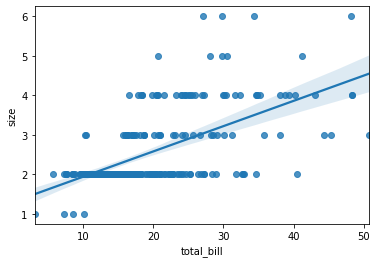

In [11]:
sns.regplot(data=tips, x='total_bill', y='size')

<AxesSubplot:xlabel='tip', ylabel='Count'>

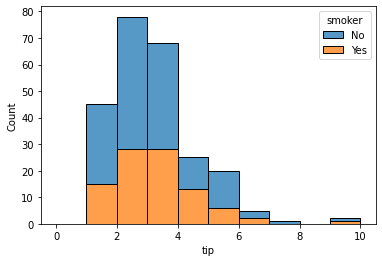

In [12]:
sns.histplot(data=tips, x='tip', hue='smoker', multiple='stack',
             bins=10, binrange=(0,10))

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

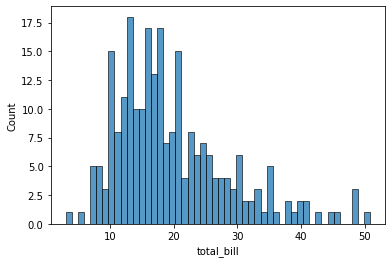

In [13]:
sns.histplot(data=tips, x='total_bill', multiple='stack', bins=50)

C:\Users\master\anaconda3\envs\multi\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

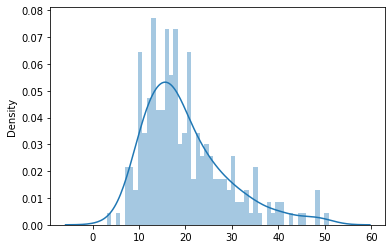

In [14]:
sns.distplot(x=tips.total_bill, bins=50)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

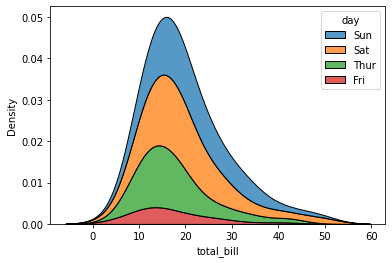

In [15]:
sns.kdeplot(data=tips, x='total_bill', hue='day', multiple='stack')

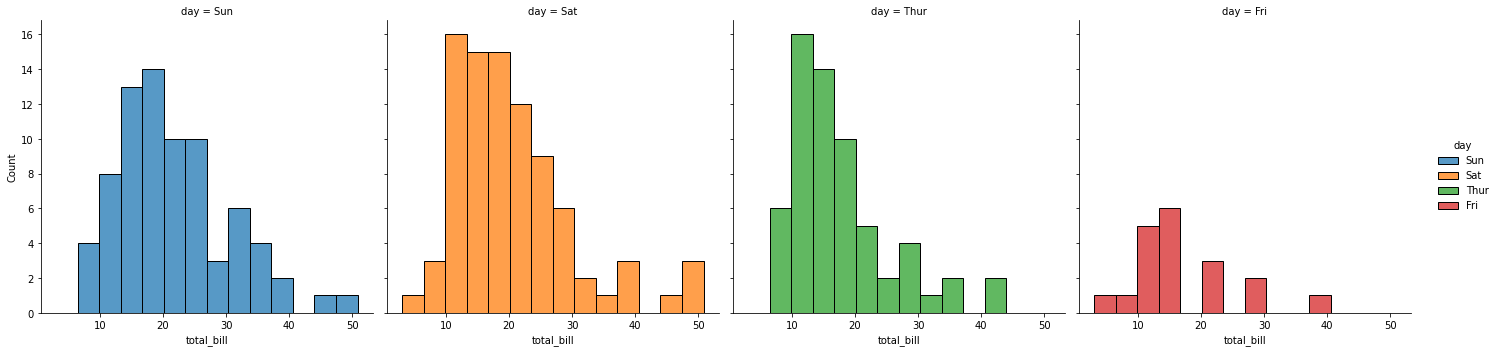

In [16]:
sns.displot(data=tips, x='total_bill', hue='day', col='day')

In [17]:
size = pd.crosstab(index=tips['size'], columns='count')
size

col_0,count
size,
1,4
2,156
3,38
4,37
5,5
6,4


<AxesSubplot:xlabel='size'>

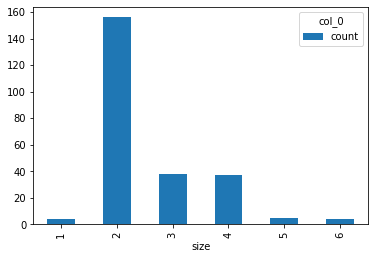

In [18]:
size.plot.bar()

In [19]:
tip_rate = tips['tip'] / tips['total_bill']
tips['tip_rate'] = tip_rate

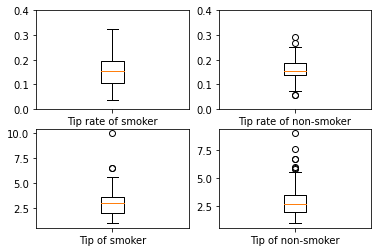

In [20]:
fig, ax = plt.subplots(2, 2)

ax[0,0].boxplot(tips.tip_rate.loc[tips.smoker=='Yes'], labels=['Tip rate of smoker'])
ax[0,0].set_ylim(0, 0.4)
ax[0,1].boxplot(tips.tip_rate.loc[tips.smoker=='No'], labels=['Tip rate of non-smoker'])
ax[0,1].set_ylim(0, 0.4)

ax[1,0].boxplot(tips.tip.loc[tips.smoker=='Yes'], labels=['Tip of smoker'])
# ax[1,0].set_ylim(0, 0.4)
ax[1,1].boxplot(tips.tip.loc[tips.smoker=='No'], labels=['Tip of non-smoker'])
# ax[1,1].set_ylim(0, 0.4)
plt.show()

<AxesSubplot:xlabel='tip', ylabel='Count'>

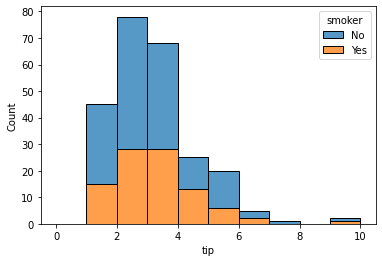

In [21]:
sns.histplot(data=tips, x='tip', hue='smoker', multiple='stack',
            bins=10, binrange=(0,10))

In [22]:
import pandas_profiling

In [23]:
tips.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
tips['sex'] = tips['sex'].replace({'Female':0, 'Male':1})
tips['smoker'] = tips['smoker'].replace({'No':0, 'Yes':1})
tips['day'] = tips['day'].replace({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3})
tips['time'] = tips['time'].replace({'Lunch':0, 'Dinner':1})

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,0,0,3,1,2,0.059447
1,10.34,1.66,1,0,3,1,3,0.160542
2,21.01,3.50,1,0,3,1,3,0.166587
3,23.68,3.31,1,0,3,1,2,0.139780
4,24.59,3.61,0,0,3,1,4,0.146808


In [26]:
tips.groupby(tips['day']).size()

day
0    62
1    19
2    87
3    76
dtype: int64

In [27]:
tips['total_bill'] = (tips['total_bill'] - tips['total_bill'].mean()) / tips['total_bill'].std()
tips['tip'] = (tips['tip'] - tips['tip'].mean()) / tips['tip'].std()


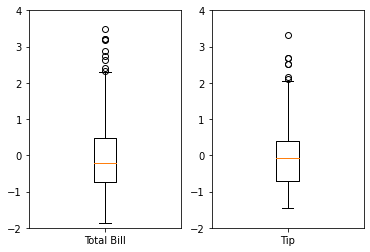

In [28]:
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(tips.total_bill, labels=['Total Bill'])
ax[1].boxplot(tips.tip, labels=['Tip'])
ax[0].set_ylim(-2, 4)
ax[1].set_ylim(-2, 4)
plt.show()

In [29]:
tips.describe().round(2)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
count,244.00,244.00,244.00,244.00,244.00,244.00,244.00,244.00
mean,-0.00,0.00,0.64,0.38,1.73,0.72,2.57,0.16
std,1.00,1.00,0.48,0.49,1.16,0.45,0.95,0.06
min,-1.88,-1.44,0.00,0.00,0.00,0.00,1.00,0.04
25%,-0.72,-0.72,0.00,0.00,0.00,0.00,2.00,0.13
50%,-0.22,-0.07,1.00,0.00,2.00,1.00,2.00,0.15
75%,0.49,0.41,1.00,1.00,3.00,1.00,3.00,0.19
max,3.48,5.06,1.00,1.00,3.00,1.00,6.00,0.71


In [30]:
tips.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]